<a href="https://colab.research.google.com/github/aniuta-mul/Python_Projects/blob/main/Company_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data overview.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Mate_homework

Mounted at /content/drive
/content/drive/MyDrive/Mate_homework


In [ ]:
import numpy as np
import pandas as pd

countries = pd.read_csv("countries.csv")
events = pd.read_csv("events.csv")
products = pd.read_csv("products.csv")

In [ ]:
countries

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia
...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,Oceania,Polynesia
245,Western Sahara,EH,ESH,Africa,Northern Africa
246,Yemen,YE,YEM,Asia,Western Asia
247,Zambia,ZM,ZMB,Africa,Sub-Saharan Africa


In [ ]:
events

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79
...,...,...,...,...,...,...,...,...,...,...
1325,994504153,1/10/2017,1/13/2017,M,SWE,4594,Online,4734.0,9.33,6.92
1326,994978797,12/5/2014,1/2/2015,H,ITA,1270,Offline,5192.0,47.45,31.79
1327,996754205,9/20/2010,9/22/2010,L,RUS,7331,Offline,574.0,255.28,159.42
1328,998043382,6/15/2010,7/3/2010,H,MLT,8293,Online,2070.0,437.20,263.33


In [ ]:
products

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies
5,4594,Fruits
6,5988,Vegetables
7,7331,Baby Food
8,8875,Meat
9,8293,Cosmetics


У таблиці countries міститься інформація про країни, регіони і суб-регіони, а також код країн і код регіону.

У таблиці events міститься інформація про id замовлення, дату замовлення і відправлення, приорітет замовлення, приорітет замовлення, код країни, id продукту, канали продажу, кількість одиниць, ціна за одиницю і собівартість одиниці товару.

У таблиці products міститься інформація про тип продукту і id продукту.

Таблиця events поєднується з таблицею countries за допомогою ключивих полів Country Code i alpha-3, а таблиці events і products поєднуються за колонками Product ID і id.

#2. Data cleaning. Робота із пропущеними даними, некоректними даними, аномаліями.


In [ ]:
countries.info()
products.info()
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      

Таблиця countries має 249 записів, причому деякі із стовпців мають пропущені значення. Також, з першопого погляду усі значення розпізнаються правильно.

Таблиця products має 12 записів і стовпці не містять пропущених значень. Також значення стовпців розпізнаються правильно.

Таблиця events містить 1330 рядків і деякі з стовпція мають пропущені значення. Усі числові стовпці розпізнаються павильно, але виникли проблеми з розбізнанням стовпців  Order Date і Sale Date.

In [ ]:
events.describe()

,Order ID,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330.000000,1328.000000,1330.000000,1330.000000
mean,5.412048e+08,5788.096241,4952.201807,264.893541,187.246812
std,2.573882e+08,2820.728878,2905.198996,217.323460,176.158873
min,1.006406e+08,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,3127.000000,2356.750000,81.730000,35.840000
50%,5.387164e+08,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,8969.000000,9999.000000,668.270000,524.960000


In [ ]:
events.isna().sum() / events.shape[0] * 100

,0
Order ID,0.000000
Order Date,0.000000
Ship Date,0.000000
Order Priority,0.000000
Country Code,6.165414
Product ID,0.000000
Sales Channel,0.000000
Units Sold,0.150376
Unit Price,0.000000
Unit Cost,0.000000


In [ ]:
countries.isna().sum() / countries.shape[0] * 100

,0
name,0.000000
alpha-2,0.401606
alpha-3,0.000000
region,0.401606
sub-region,0.401606


Оскільки доля пропущених значень у обох таблицях є незначною, то можемо видалити їх.

In [ ]:
events = events.dropna()
countries = countries.dropna()

In [ ]:
# Convert the date column to datetime
events["Order Date"] = pd.to_datetime(events["Order Date"])
events["Ship Date"] = pd.to_datetime(events["Ship Date"])

events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1246 non-null   int64         
 1   Order Date      1246 non-null   datetime64[ns]
 2   Ship Date       1246 non-null   datetime64[ns]
 3   Order Priority  1246 non-null   object        
 4   Country Code    1246 non-null   object        
 5   Product ID      1246 non-null   int64         
 6   Sales Channel   1246 non-null   object        
 7   Units Sold      1246 non-null   float64       
 8   Unit Price      1246 non-null   float64       
 9   Unit Cost       1246 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 107.1+ KB


<ipython-input-11-5991a1a91bf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events["Order Date"] = pd.to_datetime(events["Order Date"])
<ipython-input-11-5991a1a91bf7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events["Ship Date"] = pd.to_datetime(events["Ship Date"])


In [ ]:
#bring the data to one form
events = events.applymap(lambda x: x.capitalize() if isinstance(x, str) else x)
countries = countries.applymap(lambda x: x.capitalize() if isinstance(x, str) else x)
products = products.applymap(lambda x: x.capitalize() if isinstance(x, str) else x)

#remove extra spaces
events = events.applymap(lambda x: x.strip() if isinstance(x, str) else x)
countries = countries.applymap(lambda x: x.strip() if isinstance(x, str) else x)
products = products.applymap(lambda x: x.strip() if isinstance(x, str) else x)

<ipython-input-12-027c3cc2bac1>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  events = events.applymap(lambda x: x.capitalize() if isinstance(x, str) else x)
<ipython-input-12-027c3cc2bac1>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  countries = countries.applymap(lambda x: x.capitalize() if isinstance(x, str) else x)
<ipython-input-12-027c3cc2bac1>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  products = products.applymap(lambda x: x.capitalize() if isinstance(x, str) else x)
<ipython-input-12-027c3cc2bac1>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  events = events.applymap(lambda x: x.strip() if isinstance(x, str) else x)
<ipython-input-12-027c3cc2bac1>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  countries = countries.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
#checking for duplicates in data
events.duplicated().sum()

0

In [ ]:
countries.duplicated().sum()

0

In [ ]:
products.duplicated().sum()

0

Дублікатів у всіх трьох таблицях не виявлено.

In [ ]:
events.describe()

,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.246000e+03,1246,1246,1246.000000,1246.000000,1246.000000,1246.000000
mean,5.432231e+08,2013-10-11 14:45:15.890850816,2013-11-05 11:46:07.897271296,5756.146067,4953.186998,264.203387,186.310088
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.237987e+08,2011-12-09 18:00:00,2011-12-31 12:00:00,2455.000000,2349.250000,81.730000,35.840000
50%,5.438407e+08,2013-10-14 00:00:00,2013-11-03 00:00:00,5988.000000,4980.000000,154.060000,97.440000
75%,7.539619e+08,2015-09-01 12:00:00,2015-10-07 18:00:00,8293.000000,7477.000000,433.372500,263.330000
max,9.998797e+08,2017-07-22 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573524e+08,NaN,NaN,2827.558739,2915.825155,216.592937,175.503652


Помітно, що присутні аномалії у стовпцях Unit Price і Unit Price. Оскільки середнє значення у рази більше за медіану, а це значить асиметрія розподілу значень у бік більших значень.

#3. Data analysis and visualization. Аналіз та візуалізація даних, знаходження цінних інсайтів.#


###З’єднання трьох таблиць в один датафрейм.

In [ ]:
# merge table
df_1 = pd.merge(events, countries, left_on="Country Code", right_on="alpha-3", how="left")
df = pd.merge(df_1, products, left_on="Product ID", right_on="id", how="left")
df.columns = df.columns.str.lower().str.replace(" ", "_")
df = df.drop(columns=["id", "alpha-3", "country_code", "product_id", "alpha-2"])
df = df.rename(columns={"name": "country"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1246 non-null   int64         
 1   order_date      1246 non-null   datetime64[ns]
 2   ship_date       1246 non-null   datetime64[ns]
 3   order_priority  1246 non-null   object        
 4   sales_channel   1246 non-null   object        
 5   units_sold      1246 non-null   float64       
 6   unit_price      1246 non-null   float64       
 7   unit_cost       1246 non-null   float64       
 8   country         1246 non-null   object        
 9   region          1246 non-null   object        
 10  sub-region      1246 non-null   object        
 11  item_type       1246 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(6)
memory usage: 116.9+ KB


In [ ]:
df.head()

,order_id,order_date,ship_date,order_priority,sales_channel,units_sold,unit_price,unit_cost,country,region,sub-region,item_type
0,100640618,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Norway,Europe,Northern europe,Cereal
1,100983083,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern europe,Cereal
2,102230632,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern europe,Clothes
3,103435266,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern europe,Beverages
4,103450715,2015-03-15,2015-04-18,H,Online,2220.0,651.21,524.96,Slovakia,Europe,Eastern europe,Office supplies


In [ ]:
df["total_revenue"] = df["units_sold"] * df["unit_price"]
df["total_cost"] = df["units_sold"] * df["unit_cost"]
df["total_profit"] = df["total_revenue"] - df["total_cost"]
df.head()

,order_id,order_date,ship_date,order_priority,sales_channel,units_sold,unit_price,unit_cost,country,region,sub-region,item_type,total_revenue,total_cost,total_profit
0,100640618,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Norway,Europe,Northern europe,Cereal,133705.00,76121.50,57583.50
1,100983083,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern europe,Cereal,409960.10,233400.23,176559.87
2,102230632,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern europe,Clothes,127966.88,41968.64,85998.24
3,103435266,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern europe,Beverages,362897.60,243129.92,119767.68
4,103450715,2015-03-15,2015-04-18,H,Online,2220.0,651.21,524.96,Slovakia,Europe,Eastern europe,Office supplies,1445686.20,1165411.20,280275.00


###Ключові метрик діяльності компанії: загальна кількість замовлень, загальний прибуток, загальна кількість охоплених країн тощо.

In [ ]:
df.describe()

,order_id,order_date,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
count,1.246000e+03,1246,1246,1246.000000,1246.000000,1246.000000,1.246000e+03,1.246000e+03,1.246000e+03
mean,5.432231e+08,2013-10-11 14:45:15.890850816,2013-11-05 11:46:07.897271296,4953.186998,264.203387,186.310088,1.283294e+06,9.031097e+05,3.801838e+05
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,2.000000,9.330000,6.920000,5.038200e+02,3.736800e+02,1.301400e+02
25%,3.237987e+08,2011-12-09 18:00:00,2011-12-31 12:00:00,2349.250000,81.730000,35.840000,2.677339e+05,1.594747e+05,8.498177e+04
50%,5.438407e+08,2013-10-14 00:00:00,2013-11-03 00:00:00,4980.000000,154.060000,97.440000,7.582833e+05,4.272529e+05,2.733974e+05
75%,7.539619e+08,2015-09-01 12:00:00,2015-10-07 18:00:00,7477.000000,433.372500,263.330000,1.718418e+06,1.090339e+06,5.513703e+05
max,9.998797e+08,2017-07-22 00:00:00,2017-08-31 00:00:00,9999.000000,668.270000,524.960000,6.672676e+06,5.248025e+06,1.700449e+06
std,2.573524e+08,NaN,NaN,2915.825155,216.592937,175.503652,1.455639e+06,1.143107e+06,3.729905e+05


In [ ]:
orders_by_country = df["country"].value_counts()
orders_by_country[:10]

,count
country,
Andorra,40
San marino,40
Romania,34
Bosnia and herzegovina,33
Ukraine,33
Greece,32
Macedonia,32
Malta,32
Russia,32


In [ ]:
orders_by_region = df["region"].value_counts()
orders_by_region

,count
region,
Europe,1164
Asia,82


In [ ]:
sales_channels = df["sales_channel"].value_counts()
sales_channels

,count
sales_channel,
Online,625
Offline,621


In [ ]:
orders_by_subregio = df["sub-region"].value_counts()
orders_by_subregio

,count
sub-region,
Southern europe,411
Eastern europe,271
Northern europe,259
Western europe,223
Western asia,82


In [ ]:
count_ordered_products = df.groupby("item_type")["units_sold"].sum()
count_ordered_products

,units_sold
item_type,
Baby food,524265.0
Beverages,577991.0
Cereal,460266.0
Clothes,579313.0
Cosmetics,506188.0
Fruits,531135.0
Household,417308.0
Meat,477233.0
Office supplies,581481.0


In [ ]:
coutn_counrty = df["country"].count()
coutn_counrty

1246

###Аналіз продажів (доходи, витрати, прибутки, популярність товарів) та візуалізації в розрізі: категорій товарів; географії (країн, регіонів); каналів продажу (онлайн або офлайн).

total_revenue	total_cost	total_profit


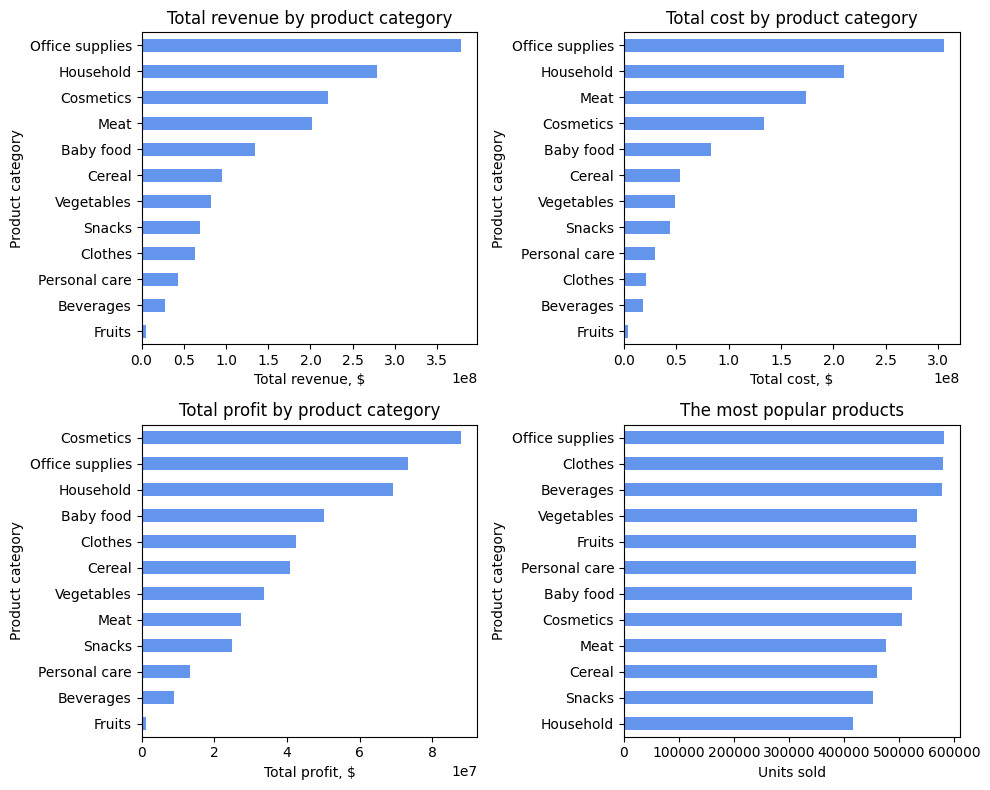

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

df.groupby("item_type")["total_revenue"].sum().sort_values().plot(kind="barh", color="cornflowerblue", ax=ax[0, 0])
ax[0, 0].set_title("Total revenue by product category")
ax[0, 0].set_xlabel("Total revenue, $")
ax[0, 0].set_ylabel("Product category")

df.groupby("item_type")["total_cost"].sum().sort_values().plot(kind="barh", color="cornflowerblue", ax=ax[0, 1])
ax[0, 1].set_title("Total cost by product category")
ax[0, 1].set_xlabel("Total cost, $")
ax[0, 1].set_ylabel("Product category")

df.groupby("item_type")["total_profit"].sum().sort_values().plot(kind="barh", color="cornflowerblue", ax=ax[1, 0])
ax[1, 0].set_title("Total profit by product category")
ax[1, 0].set_xlabel("Total profit, $")
ax[1, 0].set_ylabel("Product category")

df.groupby("item_type")["units_sold"].sum().sort_values().plot(kind="barh", color="cornflowerblue", ax=ax[1, 1])
ax[1, 1].set_title("The most popular products")
ax[1, 1].set_xlabel("Units sold")
ax[1, 1].set_ylabel("Product category")

plt.tight_layout()
plt.show()


Найбільне заробітків компанії приносять такі категорії як Cosmetics, Office supplies і Household. А набільші витрат вимагають такі категорїї товарів Office supplies, Household і Meat. Найбільше одиниць товарів замовляють у категоріях Office supplies, Clothes і Beverages.

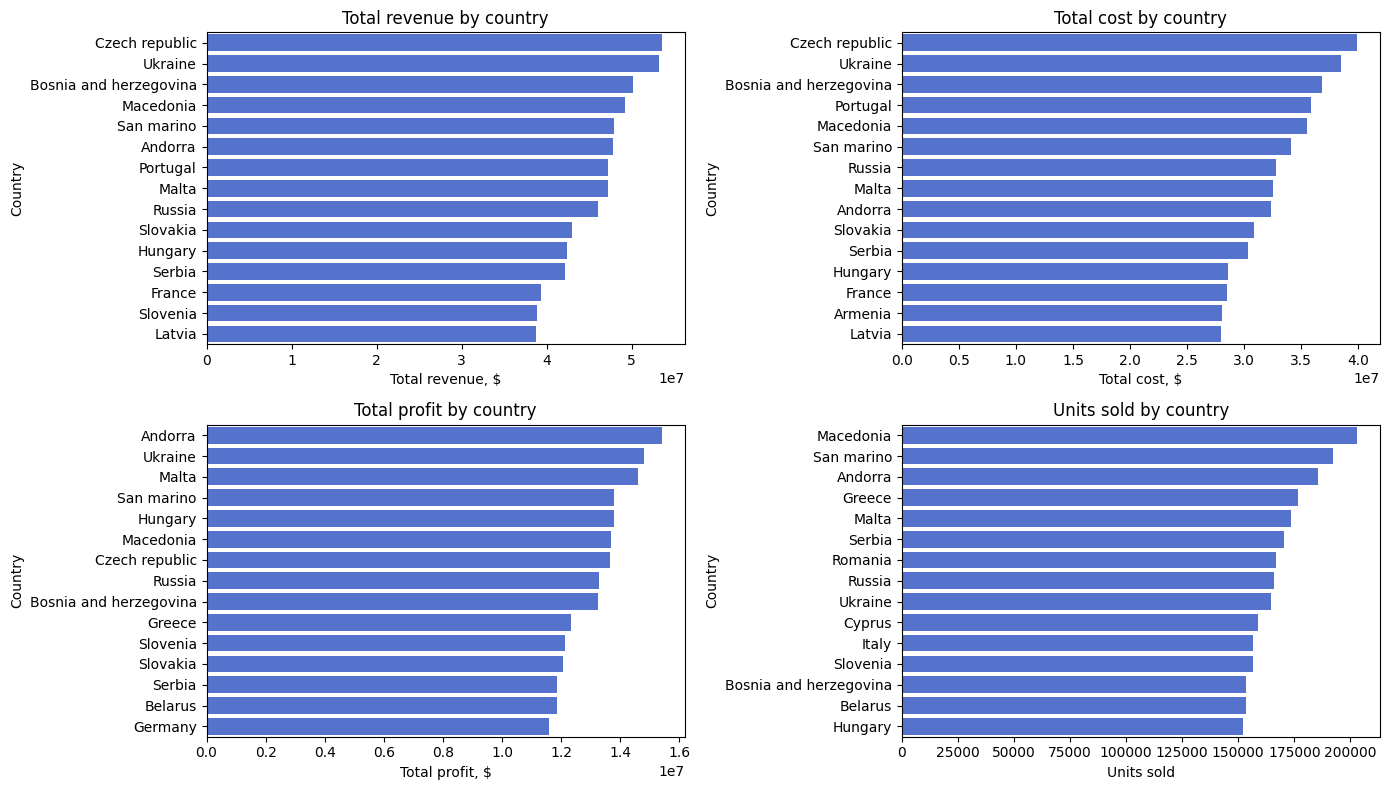

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8))

total_revenue_by_country = df.groupby("country")["total_revenue"].sum().reset_index().sort_values(by="total_revenue", ascending=False)[:15]
sns.barplot(data=total_revenue_by_country, x="total_revenue", y="country", color="royalblue", errorbar=("ci", False), ax=ax[0, 0])
ax[0, 0].set_title("Total revenue by country")
ax[0, 0].set_xlabel("Total revenue, $")
ax[0, 0].set_ylabel("Country")

total_cost_by_country = df.groupby("country")["total_cost"].sum().reset_index().sort_values(by="total_cost", ascending=False)[:15]
sns.barplot(data=total_cost_by_country, x="total_cost", y="country", color="royalblue", errorbar=("ci", False), ax=ax[0, 1])
ax[0, 1].set_title("Total cost by country")
ax[0, 1].set_xlabel("Total cost, $")
ax[0, 1].set_ylabel("Country")


total_profit_by_country = df.groupby("country")["total_profit"].sum().reset_index().sort_values(by="total_profit", ascending=False)[:15]
sns.barplot(data=total_profit_by_country, x="total_profit", y="country", color="royalblue", errorbar=("ci", False), ax=ax[1, 0])
ax[1, 0].set_title("Total profit by country")
ax[1, 0].set_xlabel("Total profit, $")
ax[1, 0].set_ylabel("Country")

popular_products = df.groupby("country")["units_sold"].sum().reset_index().sort_values(by="units_sold", ascending=False)[:15]
sns.barplot(data=popular_products, x="units_sold", y="country", color="royalblue", errorbar=("ci", False), ax=ax[1, 1])
ax[1, 1].set_title("Units sold by country")
ax[1, 1].set_xlabel("Units sold")
ax[1, 1].set_ylabel("Country")

plt.tight_layout()
plt.show()

Найбільший дохід для компанії приносять такі країни як Andorra, Ukraine і Malta, а найбільши одиниць товару замовляють такі країни як Macedonia, San marino і Andorra.

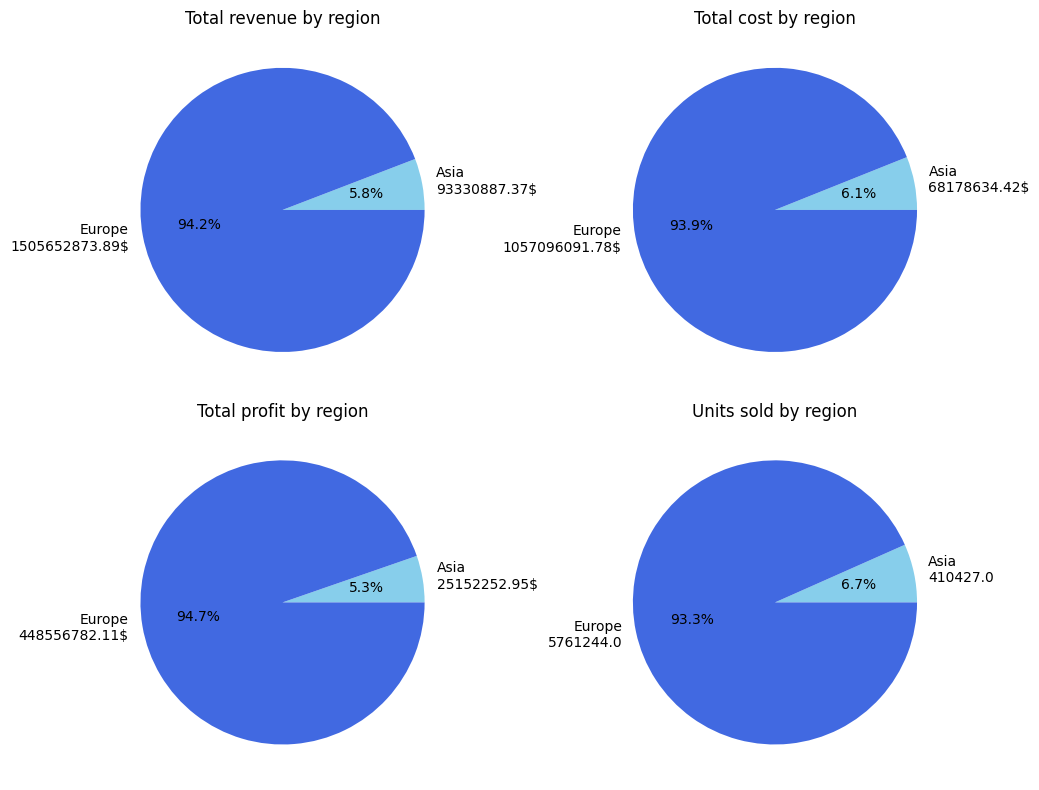

In [ ]:
colors = ["skyblue", "royalblue"]
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

total_revenue_by_region = df.groupby("region")["total_revenue"].sum().reset_index()
labels = [f"{reg}\n{reven}$" for reg, reven in zip(total_revenue_by_region["region"], total_revenue_by_region["total_revenue"])]
ax[0, 0].pie(total_revenue_by_region["total_revenue"], labels=labels, colors=colors, autopct="%1.1f%%")
ax[0, 0].set_title("Total revenue by region")

total_cost_by_region = df.groupby("region")["total_cost"].sum().reset_index()
labels = [f"{reg}\n{cos}$" for reg, cos in zip(total_cost_by_region["region"], total_cost_by_region["total_cost"])]
ax[0, 1].pie(total_cost_by_region["total_cost"], labels=labels, colors=colors, autopct="%1.1f%%")
ax[0, 1].set_title("Total cost by region")


total_profit_by_region = df.groupby("region")["total_profit"].sum().reset_index()
labels = [f"{reg}\n{prof}$" for reg, prof in zip(total_profit_by_region["region"], total_profit_by_region["total_profit"])]
ax[1, 0].pie(total_profit_by_region["total_profit"], labels=labels, colors=colors, autopct="%1.1f%%")
ax[1, 0].set_title("Total profit by region")

units_sold_by_region = df.groupby("region")["units_sold"].sum().reset_index()
labels = [f"{reg}\n{sold}" for reg, sold in zip(units_sold_by_region["region"], units_sold_by_region["units_sold"])]
ax[1, 1].pie(units_sold_by_region["units_sold"], labels=labels, colors=colors, autopct="%1.1f%%")
ax[1, 1].set_title("Units sold by region")

plt.tight_layout()
plt.show()

Майже 95 відсотків доходу компанії приносить Європа і відповідно 94 відсотки замовлених одиниць товару надходить від Європи.

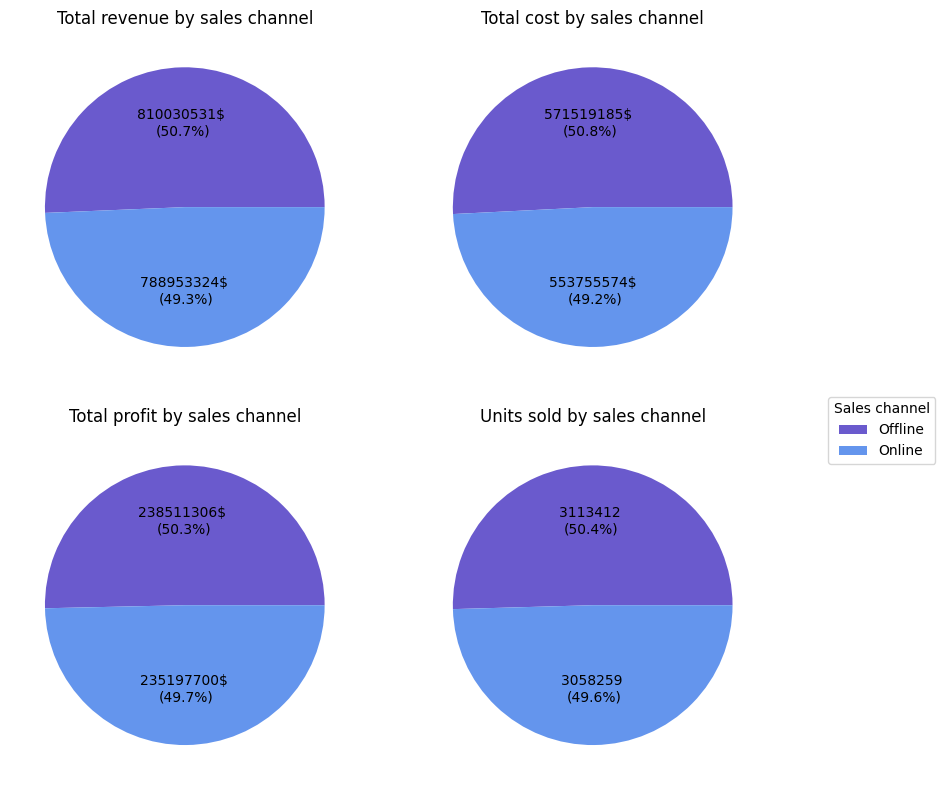

In [ ]:
colors = ["slateblue","cornflowerblue"]
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

total_revenue_by_sales_channel = df.groupby("sales_channel")["total_revenue"].sum().reset_index()
def format_label(pct, all_vals):
    absolute = int(pct/100. * sum(all_vals))
    return f"{absolute}$ \n({pct:.1f}%)"
ax[0, 0].pie(total_revenue_by_sales_channel["total_revenue"], autopct=lambda pct: format_label(pct, total_revenue_by_sales_channel["total_revenue"]), colors=colors)
ax[0, 0].set_title("Total revenue by sales channel")

total_cost_by_sales_channel = df.groupby("sales_channel")["total_cost"].sum().reset_index()
def format_label(pct, all_vals):
    absolute = int(pct/100. * sum(all_vals))
    return f"{absolute}$ \n({pct:.1f}%)"
ax[0, 1].pie(total_cost_by_sales_channel["total_cost"], colors=colors, autopct=lambda pct: format_label(pct, total_cost_by_sales_channel["total_cost"]))
ax[0, 1].set_title("Total cost by sales channel")

total_profit_by_sales_channel = df.groupby("sales_channel")["total_profit"].sum().reset_index()
def format_label(pct, all_vals):
    absolute = int(pct/100. * sum(all_vals))
    return f"{absolute}$ \n({pct:.1f}%)"
ax[1, 0].pie(total_profit_by_sales_channel["total_profit"], colors=colors, autopct=lambda pct: format_label(pct, total_profit_by_sales_channel["total_profit"]))
ax[1, 0].set_title("Total profit by sales channel")

units_sold_by_sales_channel = df.groupby("sales_channel")["units_sold"].sum().reset_index()
def format_label(pct, all_vals):
    absolute = int(pct/100. * sum(all_vals))
    return f"{absolute} \n({pct:.1f}%)"
ax[1, 1].pie(units_sold_by_sales_channel["units_sold"], colors=colors, autopct=lambda pct: format_label(pct, units_sold_by_sales_channel["units_sold"]))
ax[1, 1].set_title("Units sold by sales channel")

plt.legend(labels=units_sold_by_sales_channel["sales_channel"], title="Sales channel", loc="right", bbox_to_anchor=(1, 0, 0.5, 2))
plt.tight_layout()
plt.show()

Більшу (але не значно) кількість покупок відбувається Offline ніж Online відповідно і більше доходів для компанії приносять Offline покупки.

##Аналіз інтервалу часу між замовленням та його відвантаженням та візуалізації в розрізі: категорій товарів; країн;регіонів.

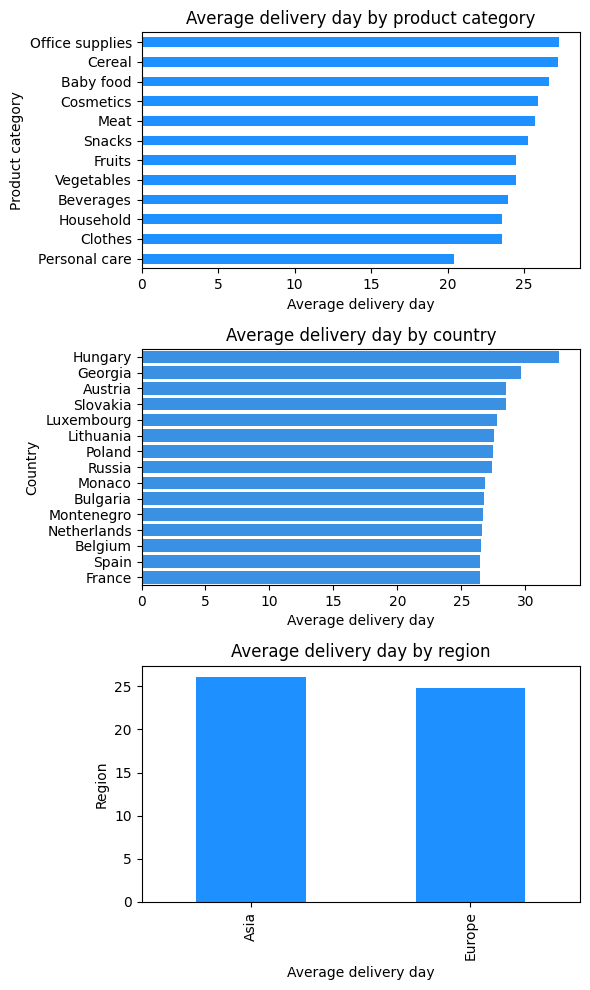

In [ ]:
df["delivery_days"] = (df["ship_date"] - df["order_date"]).dt.days

fig, ax = plt.subplots(3, 1, figsize=(6, 10))

df.groupby("item_type")["delivery_days"].mean().sort_values().plot(kind="barh", color="dodgerblue", ax=ax[0])
ax[0].set_title("Average delivery day by product category")
ax[0].set_xlabel("Average delivery day")
ax[0].set_ylabel("Product category")

delivery_days_by_country = df.groupby("country")["delivery_days"].mean().reset_index().sort_values(by="delivery_days", ascending=False)[:15]
sns.barplot(data=delivery_days_by_country, x="delivery_days", y="country", color="dodgerblue", errorbar=("ci", False), ax=ax[1])
ax[1].set_title("Average delivery day by country")
ax[1].set_xlabel("Average delivery day")
ax[1].set_ylabel("Country")


df.groupby("region")["delivery_days"].mean().plot(kind="bar", color="dodgerblue", ax=ax[2])
ax[2].set_title("Average delivery day by region")
ax[2].set_xlabel("Average delivery day")
ax[2].set_ylabel("Region")

plt.tight_layout()
plt.show()

Як бачимо всередньому найдовше доставляються такі категорії товарів як Office supplies і Cereal.
В середньому найбільше часу потрібно на відвантаження товару у Hungary. Доставка у країни Європи в середньому займає менше часу ніж у країни Азії, але різниця не суттєва - пару днів.


##Аналіз залежності прибутку від часу, необхідного на відвантаження товару.

Text(0, 0.5, 'Average profit')

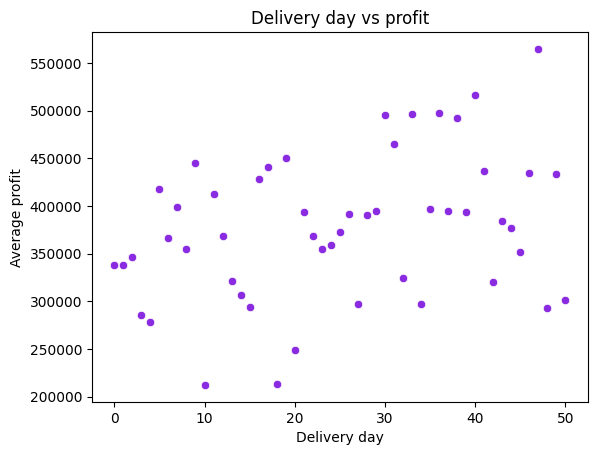

In [ ]:
profit_by_delivery_days = df.groupby("delivery_days")["total_profit"].mean().reset_index()
sns.scatterplot(data=profit_by_delivery_days, x="delivery_days", y="total_profit", color="blueviolet")
plt.title("Delivery day vs profit")
plt.xlabel("Delivery day")
plt.ylabel("Average profit")

Не виявлено залежності доходу компанії від доставки продукту.

##Аналіз за допомогою візуалізації динаміки продажів (у часі) у розрізі категорій товарів, країн, регіонів.

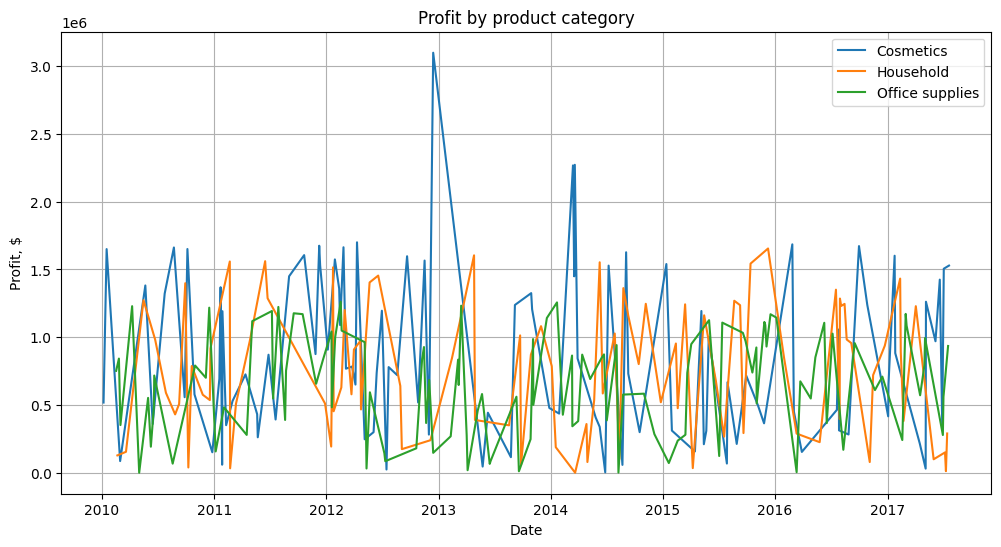

In [ ]:
df_cat = df[df["item_type"].isin(["Cosmetics", "Office supplies", "Household"])]
profit_by_date_cat = df_cat.groupby(["item_type", "order_date",])["total_profit"].sum().reset_index()
categories = profit_by_date_cat["item_type"].unique()

plt.figure(figsize=(12, 6))
for category in categories:
    cat_data = profit_by_date_cat[profit_by_date_cat["item_type"] == category]
    plt.plot(cat_data["order_date"], cat_data["total_profit"], label=category)

plt.xlabel("Date")
plt.ylabel("Profit, $")
plt.title("Profit by product category")
plt.legend()
plt.grid(True)
plt.show()

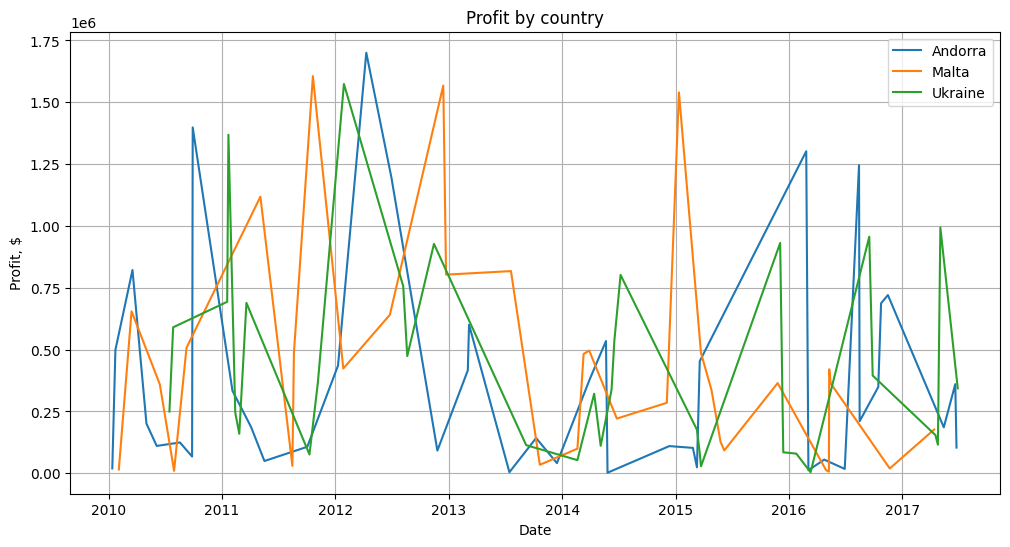

In [ ]:
df_cun = df[df["country"].isin(["Andorra", "Ukraine", "Malta"])]

profit_by_date_cun = df_cun.groupby(["country", "order_date",])["total_profit"].sum().reset_index()
countriess = profit_by_date_cun["country"].unique()

plt.figure(figsize=(12, 6))
for country in countriess:
    cun_data = profit_by_date_cun[profit_by_date_cun["country"] == country]
    plt.plot(cun_data["order_date"], cun_data["total_profit"], label=country)

plt.xlabel("Date")
plt.ylabel("Profit, $")
plt.title("Profit by country")
plt.legend()
plt.grid(True)
plt.show()

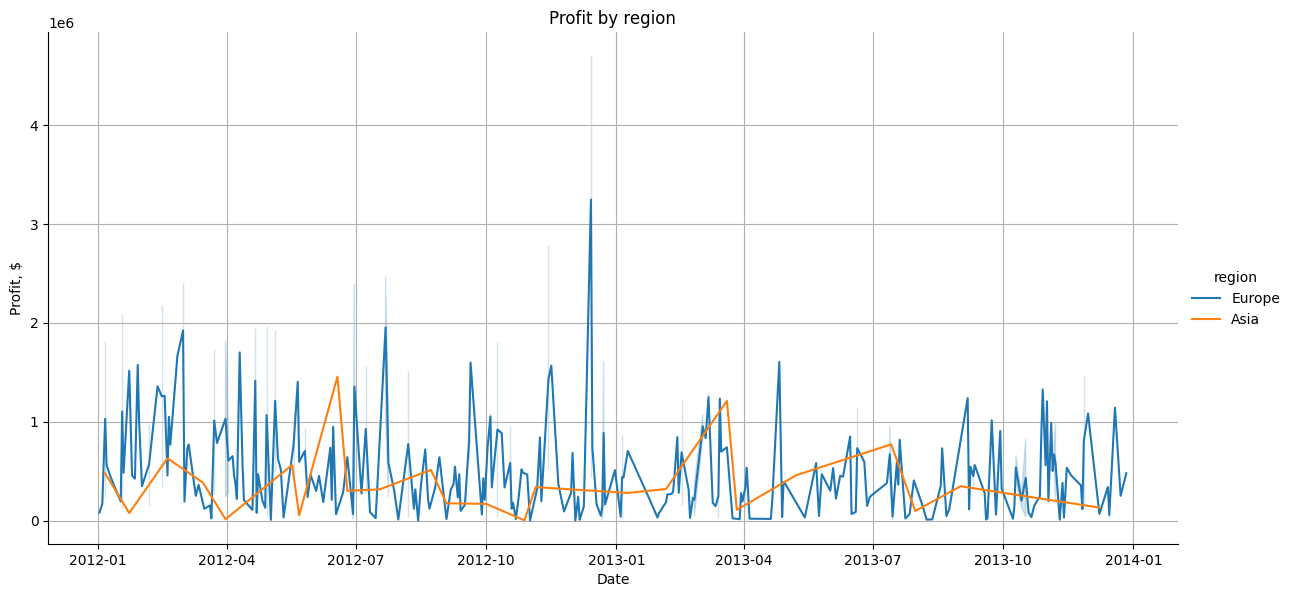

In [ ]:
df_year = df[(df["order_date"] >= "2012-01-01") & (df["order_date"] < "2014-01-01")]

sns.relplot(x="order_date", y="total_profit", kind="line", hue="region", data=df_year, estimator='sum', height=6, aspect=2)
plt.xlabel("Date")
plt.ylabel("Profit, $")
plt.title("Profit by region")
plt.grid(True)
plt.show()

Як уже було сказано раніше, найбільше доходу компанії надходить з Європи. Також було проаналізовано три найприбутковіші країни у часу, і було помічено, що суттєві замовлення були здійснені на початку або у кінці року, які, ймовірно, пов’язані з акціями чи розпродажами.
Наявність сезонних патернів, імовірно, тижневої сезонності, коли активність клієнтів зростає у певні дні тижня.

##Проведення аналізу продажів товарів за днями тижня.

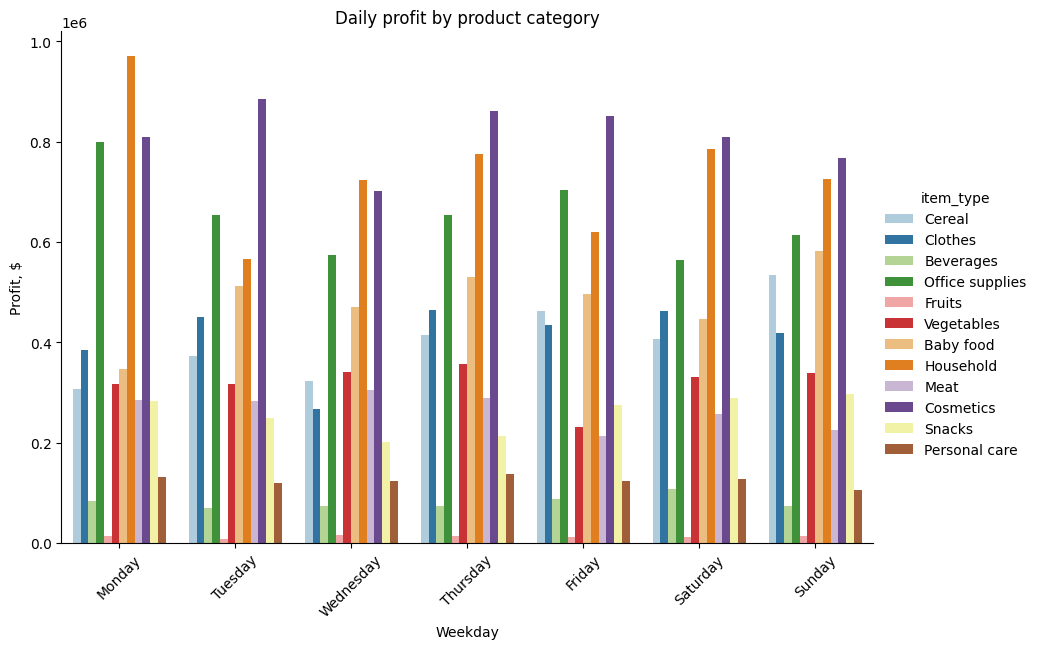

In [ ]:
df["day_name"] = df["order_date"].dt.day_name()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.catplot(x="day_name", y="total_profit", kind="bar", hue="item_type", data=df, order=day_order, errorbar=("ci", False), palette="Paired", height=6, aspect=1.5)
plt.xticks(rotation=45)
plt.title("Daily profit by product category")
plt.xlabel("Weekday")
plt.ylabel("Profit, $")
plt.show()


<ipython-input-261-b1c445ef09d0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="day_name", y="total_profit", kind="bar", data=df, order=day_order, errorbar=("ci", False), palette="viridis", height=6, aspect=1.5)


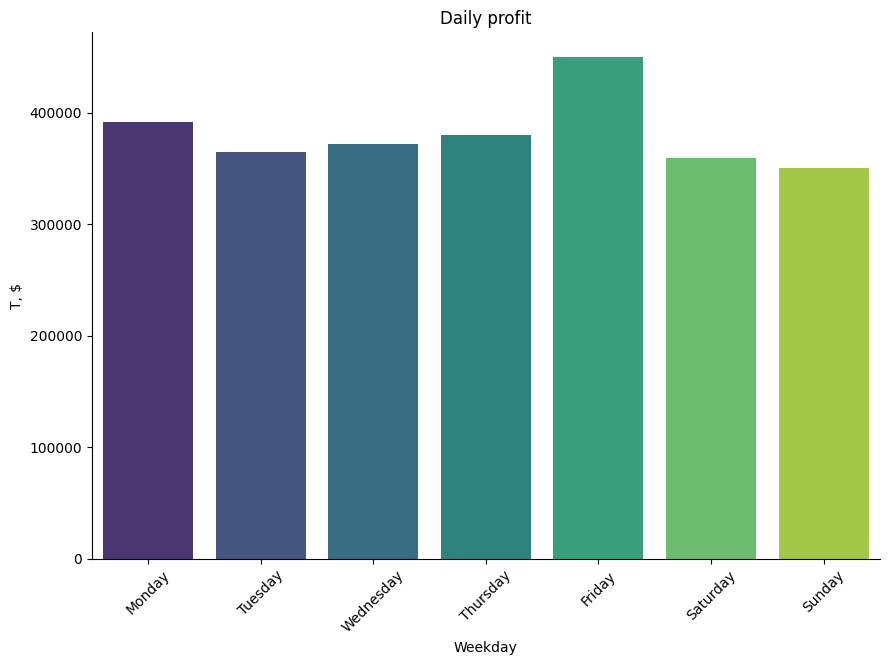

In [ ]:
df["day_name"] = df["order_date"].dt.day_name()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.catplot(x="day_name", y="total_profit", kind="bar", data=df, order=day_order, errorbar=("ci", False), palette="viridis", height=6, aspect=1.5)
plt.xticks(rotation=45)
plt.title("Daily profit")
plt.xlabel("Weekday")
plt.ylabel("Profit, $")
plt.show()


Як бачимо стабільно високий дохід день у день компанії приносить Cosmetics. Household i Office supplies приносять найбільше доходів по понеділках.
Також помічено що найбільше доходів у компанію в середньому приносять замовлення зроблені у пʼятницю, а найменше - на вихідних.


##Висновки

Потрібно посилити маркетинг у Andorra, Ukraine, Malta, оскільки ці країни найбільш прибуткові. Європа – основний ринок, тому варто зміцнювати позиції там, а також потрібно працювати над збільшенням ринку у Азії.

Підсилити Offline-продажі, оскільки вони дають більше доходу.
Оптимізувати Online-продажі (вивчити, чому вони приносять менше доходу, і покращити ефективність).

Збільшити фокус на Cosmetics, оскільки ця категорія стабільно приносить високий дохід. Оптимізувати витрати на Office supplies та Household, оскільки вони приносять дохід, але й вимагають значних витрат.

Враховувати, що найбільше замовлень і доходу – на початку та в кінці року - планувати розпродажі та акції у ці періоди. Активно просувати товари у п’ятницю (найприбутковіший день). Покращити маркетингові кампанії для підвищення продажів у вихідні. Використати понеділковий пік для Household і Office supplies.